In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from scipy import stats
import io
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import missingno as msno
from sklearn.model_selection import cross_val_score

In [2]:
dataset = pd.read_csv('Assignment6.csv')

In [5]:
dataset

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   WTT         1000 non-null   float64
 2   PTI         1000 non-null   float64
 3   EQW         1000 non-null   float64
 4   SBI         1000 non-null   float64
 5   LQE         1000 non-null   float64
 6   QWG         1000 non-null   float64
 7   FDJ         1000 non-null   float64
 8   PJF         1000 non-null   float64
 9   HQE         1000 non-null   float64
 10  NXJ         1000 non-null   float64
 11  CLASS       1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [ ]:
# we can se there are no null values

In [11]:
#dataset.describe().transpose()
dataset.describe()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,288.819436,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.000000,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,249.750000,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,499.500000,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,749.250000,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,999.000000,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [107]:
dataset.isnull().sum()

Unnamed: 0    0
WTT           0
PTI           0
EQW           0
SBI           0
LQE           0
QWG           0
FDJ           0
PJF           0
HQE           0
NXJ           0
CLASS         0
dtype: int64

In [4]:
# df.rename(columns={"OldName":"NewName"}), to rename a column
dataset = dataset.rename(columns={"TARGET CLASS":"CLASS"})

In [6]:
dataset.CLASS.value_counts()

0    500
1    500
Name: CLASS, dtype: int64

In [ ]:
# here we can see that class0 and class1 are equally distributed

In [7]:
len(dataset.loc[(dataset['WTT']==0)])
#the length should be zero, as there are no 0 value

0

In [8]:
dataset.iloc[:,0:1]
# this column is useless for our analysis, cause it's an just id or something. So we need to drop this column.

,Unnamed: 0
0,0
1,1
2,2
3,3
4,4
...,...
995,995
996,996
997,997
998,998


In [9]:
a = dataset.drop(dataset.iloc[:,0:1],axis=1)

In [10]:
a

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [7]:
new_dataset = dataset.iloc[: , 1:]

In [8]:
new_dataset

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [9]:
X = new_dataset.drop('CLASS',axis=1)

In [10]:
X.shape

(1000, 10)

In [11]:
Y = new_dataset.CLASS

In [12]:
Y.shape

(1000,)

In [ ]:
# as we can see there is a difference in value range of the features
#sc = StandardScaler() or we can use scale()

In [13]:
X_scaled = scale(X)

In [14]:
X_scaled.shape

(1000, 10)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 100)

In [16]:
X_train.shape, X_test.shape, Y_train.shape

((700, 10), (300, 10), (700,))

# SVC

In [52]:
clf = SVC(random_state=100)

In [53]:
clf

SVC(random_state=100)

In [54]:
clf.fit(X_train,Y_train)

SVC(random_state=100)

In [55]:
Y_pred = clf.predict(X_test)

In [56]:
Y_pred.shape

(300,)

In [57]:
print(confusion_matrix(Y_test, Y_pred))

[[150  12]
 [  7 131]]


In [58]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       162
           1       0.92      0.95      0.93       138

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


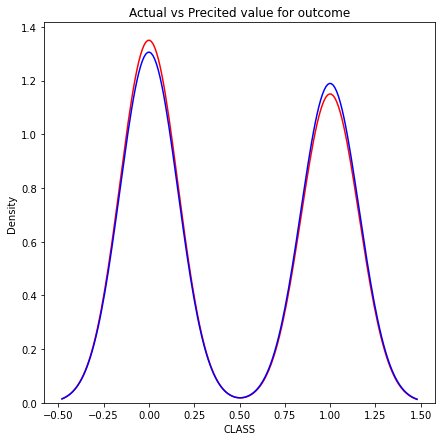

In [94]:
plt.figure(figsize=(7, 7))
ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
#plt.close()

In [61]:
param_grid = [
    {
        'C':[0.5,1,10,100], 'gamma':['scale',1,0.1,0.01,0.001,0.0001], 'kernel':['linear','rbf','poly','sigmoid']
    }
]

optimal_params = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy', verbose=0)
#https://www.geeksforgeeks.org/major-kernel-functions-in-support-vector-machine-svm/

In [63]:
optimal_params.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             scoring='accuracy')

In [64]:
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [65]:
better_clf = SVC(random_state=100, C=100, gamma=0.001, kernel='rbf')

In [66]:
better_clf

SVC(C=100, gamma=0.001, random_state=100)

In [69]:
better_clf.fit(X_train,Y_train)

SVC(C=100, gamma=0.001, random_state=100)

In [70]:
Y_pred1 = better_clf.predict(X_test)

In [72]:
Y_pred1.shape

(300,)

In [73]:
print(confusion_matrix(Y_test, Y_pred1))

[[150  12]
 [  7 131]]


In [74]:
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       162
           1       0.92      0.95      0.93       138

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


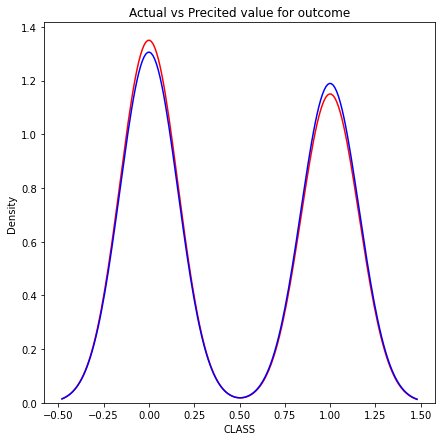

In [95]:
plt.figure(figsize=(7, 7))
ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred1, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
#plt.close()

# KNN

In [17]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((700, 10), (300, 10), (700,), (300,))

# Finding the optimum value for K (Parameter Tuning)
We can find the optimum value of K by using the k-fold cross-validation. It involves estimating the test error rate by holding out a subset of the training set from the fitting process.We’ll use 10-fold cross-validation on our dataset using a generated list of odd K’s ranging from 1–50.

In [34]:
# Creating odd list K for KNN
neighbors = list(range(1,50,1))
# range(start, stop, step)
# empty list that will hold cv scores
cv_scores = [ ]

In [35]:
#perform 10-fold cross-validation
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,Y_train,cv = 10,scoring ="accuracy")

In [36]:
cv_scores.append(scores.mean())

Now we can get the optimal value of K by either of the two methods.
Calculating the misclassification error
Plotting the accuracy score for different values of K.

In [37]:
# Changing to mis classification error
mse = [1-x for x in cv_scores]
# determing best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal no. of neighbors is {}".format(optimal_k))

The optimal no. of neighbors is 1


In [33]:
'''
def plot_accuracy(knn_list_scores):
    pd.DataFrame({"K":[i for i in range(1,50,2)], "Accuracy":knn_list_scores}).set_index("K").plot.bar(figsize= (9,6),ylim=(0.78,0.83),rot=0)
    plt.show()
plot_accuracy(cv_scores)
'''

'\ndef plot_accuracy(knn_list_scores):\n    pd.DataFrame({"K":[i for i in range(1,50,2)], "Accuracy":knn_list_scores}).set_index("K").plot.bar(figsize= (9,6),ylim=(0.78,0.83),rot=0)\n    plt.show()\nplot_accuracy(cv_scores)\n'

# According to question 

In [18]:
len(Y_test)

300

In [19]:
math.sqrt(len(Y_test))
# we can choose K=17, but according to question 1st we need to use k=1

17.320508075688775

In [20]:
classifier = KNeighborsClassifier(n_neighbors=1,p=2,metric='euclidean')

In [21]:
classifier

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [22]:
classifier.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [23]:
Y_pred2 =  classifier.predict(X_test)

In [24]:
Y_pred2.shape

(300,)

In [25]:
print(confusion_matrix(Y_test, Y_pred2))

[[146  16]
 [  7 131]]


In [26]:
print(classification_report(Y_test,Y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       162
           1       0.89      0.95      0.92       138

    accuracy                           0.92       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.93      0.92      0.92       300



c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


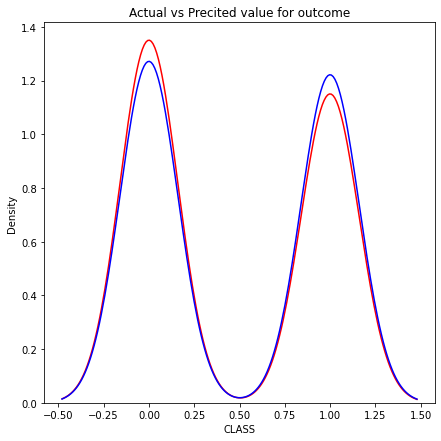

In [93]:
plt.figure(figsize=(7, 7))
ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred2, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
#plt.close()

In [39]:
classifier = KNeighborsClassifier(n_neighbors=17,p=2,metric='euclidean')

In [40]:
classifier

KNeighborsClassifier(metric='euclidean', n_neighbors=17)

In [41]:
classifier.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=17)

In [42]:
Y_pred3 =  classifier.predict(X_test)

In [43]:
print(confusion_matrix(Y_test, Y_pred3))

[[147  15]
 [  5 133]]


In [44]:
print(classification_report(Y_test,Y_pred3))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       162
           1       0.90      0.96      0.93       138

    accuracy                           0.93       300
   macro avg       0.93      0.94      0.93       300
weighted avg       0.94      0.93      0.93       300



c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


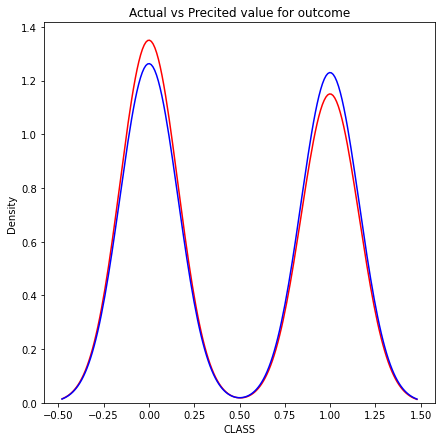

In [103]:
plt.figure(figsize=(7, 7))
ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred3, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()
# The close() function in pyplot module of matplotlib library is used to close a figure window and accepts only one parameters.

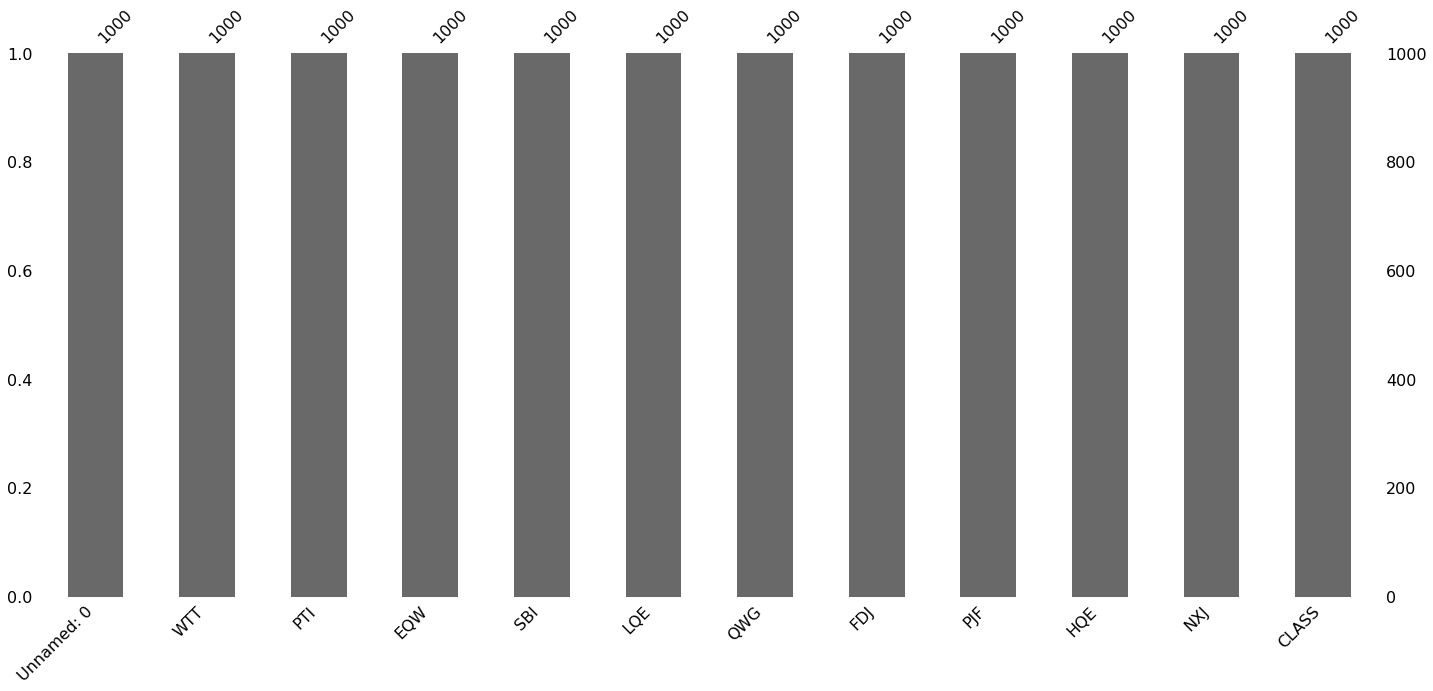

In [27]:
p=msno.bar(dataset)

<AxesSubplot:>

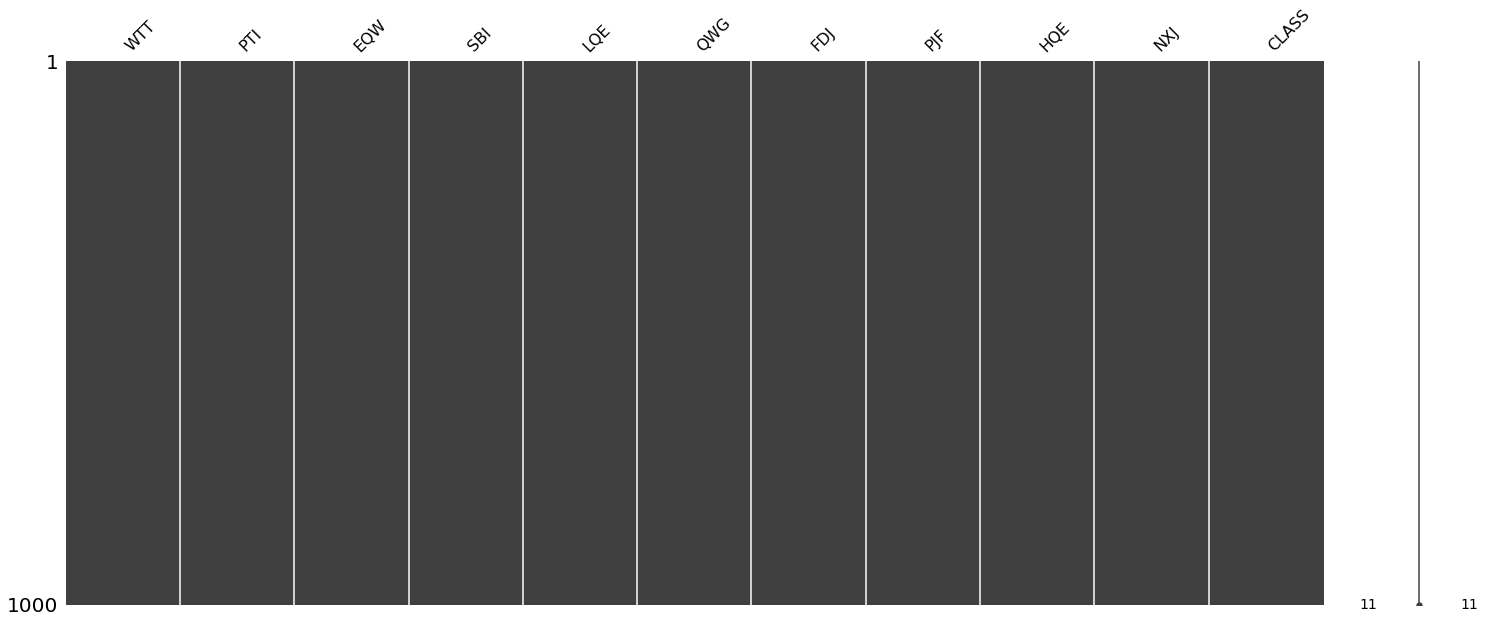

In [28]:
msno.matrix(new_dataset)

Elbow Method in Supervised Machine Learning(Optimal K Value)

In [30]:
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

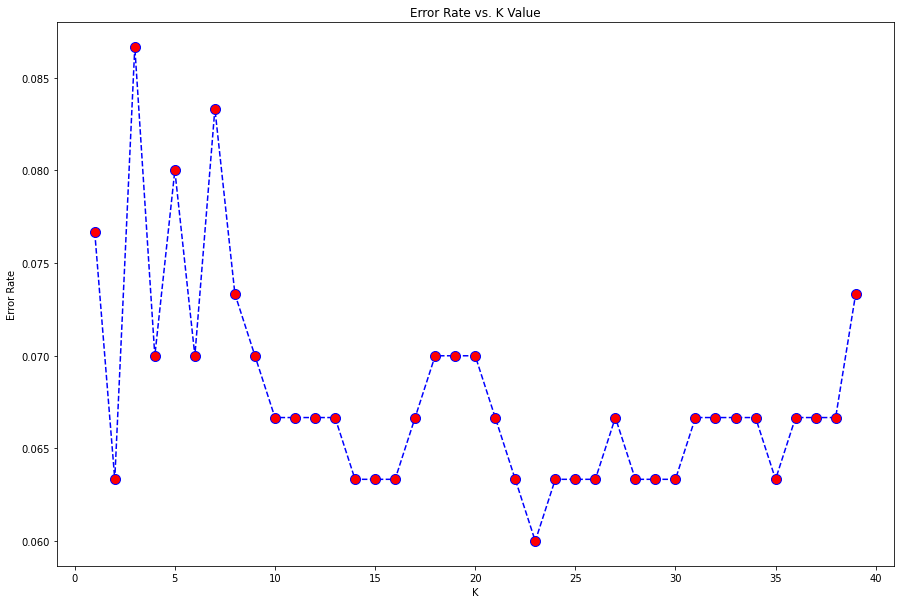

In [38]:
plt.figure(figsize=(15,10))
plt.plot(range(1,40,1),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

The optimal value of K is 23. The graph of the error rate is minimum at 23. Retrain with new K Value.

In [45]:
classifier = KNeighborsClassifier(n_neighbors=23,p=2,metric='euclidean')

In [46]:
classifier

KNeighborsClassifier(metric='euclidean', n_neighbors=23)

In [47]:
classifier.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=23)

In [48]:
Y_pred4 =  classifier.predict(X_test)

In [49]:
print(confusion_matrix(Y_test, Y_pred4))

[[148  14]
 [  4 134]]


In [50]:
print(classification_report(Y_test,Y_pred3))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       162
           1       0.90      0.96      0.93       138

    accuracy                           0.93       300
   macro avg       0.93      0.94      0.93       300
weighted avg       0.94      0.93      0.93       300



In [53]:
model = KNeighborsClassifier()
model

KNeighborsClassifier()

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


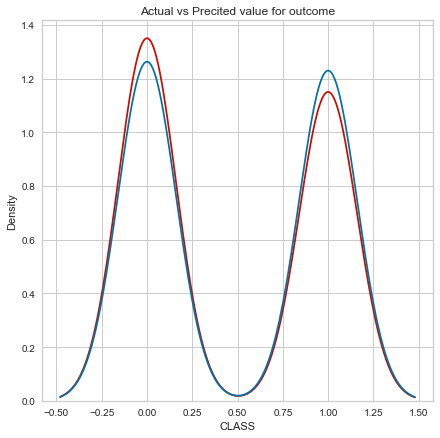

In [55]:
plt.figure(figsize=(7, 7))
ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred4, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
#plt.close()